In [16]:
import numpy as np

import pandas as pd

data = pd.read_csv('Data.csv')

In [17]:
from sklearn.model_selection import train_test_split  
x= data.iloc[:, :-1] 
y= data.iloc[:, -1]
from sklearn.preprocessing import StandardScaler 
st= StandardScaler()  

x= pd.DataFrame(st.fit_transform(x)) 




In [18]:
#MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data= pd.DataFrame(scaler.fit_transform(data)) 
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,1.0,0.140000,0.160305,0.176471,0.173077,0.177083,0.147727,0.122764,0.106359,0.049693,0.012913,0.000362,0.000342,0.000661,0.001271,0.530801,0.261133,1.0,0.0
1,1.0,1.0,0.153333,0.175573,0.176471,0.163462,0.156250,0.136364,0.142126,0.142403,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.682302,0.536341,0.0,0.0
2,1.0,1.0,0.406667,0.450382,0.487395,0.509615,0.479167,0.363636,0.137472,0.167497,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.726836,0.437973,0.0,1.0
3,1.0,1.0,0.360000,0.396947,0.436975,0.471154,0.437500,0.340909,0.099403,0.110368,0.085971,0.051525,0.016340,0.013555,0.001289,0.000496,0.514678,0.352675,0.0,0.0
4,1.0,1.0,0.286667,0.328244,0.361345,0.384615,0.395833,0.295455,0.043799,0.051281,0.003869,0.000000,0.000000,0.000000,0.000000,0.000000,0.481936,0.407122,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,0.220000,0.251908,0.277311,0.307692,0.312500,0.261364,0.014179,0.005609,0.000294,0.000052,0.000000,0.000000,0.000000,0.000000,0.756089,0.365106,0.0,0.0
1147,1.0,1.0,0.320000,0.366412,0.403361,0.461538,0.458333,0.409091,0.155722,0.163809,0.076060,0.016390,0.000030,0.000000,0.000000,0.000000,0.663701,0.410954,0.0,0.0
1148,1.0,0.0,0.320000,0.358779,0.394958,0.423077,0.437500,0.363636,0.074612,0.083569,0.016624,0.002307,0.000218,0.000000,0.000000,0.000000,0.859281,0.446002,0.0,0.0
1149,1.0,1.0,0.253333,0.267176,0.235294,0.211538,0.125000,0.068182,0.099548,0.075419,0.044696,0.018030,0.010958,0.016263,0.040346,0.056559,0.526653,0.302456,1.0,1.0


In [ ]:
from sklearn.feature_selection import RFE
from sklearn import svm


model = svm.SVC(kernel='linear')

rfe = RFE(model, n_features_to_select=10)

rfe.fit(x,y)


filter = rfe.support_
ranking = rfe.ranking_
print(filter)
print(ranking)

data = x[x.columns[filter]]
data["outcome"]=y

data.to_csv("newdata.csv",index=False)



[6.27879039e-01 3.26625250e-01 2.99506524e-02 9.75683751e-03
 3.22116869e-03 9.94671514e-04 8.65825768e-04 3.07497739e-04
 1.71514950e-04 9.69757876e-05 6.77015200e-05 2.51638586e-05
 2.32480053e-05 1.07400599e-05 2.79552911e-06 4.96011619e-07
 2.67233793e-07 1.11439037e-07 4.25056531e-08]


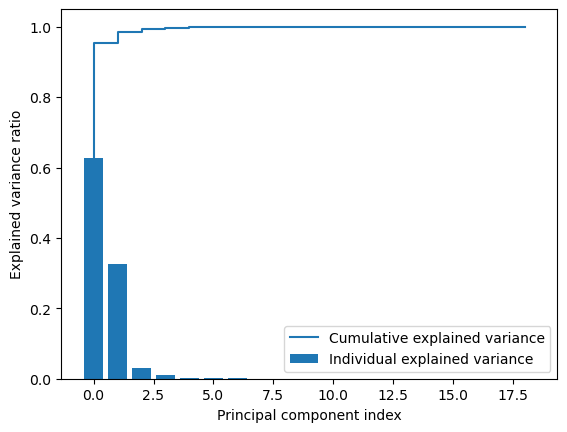

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
df= pd.read_csv("Data.csv") 
x = df.iloc[:, :-1] 
y = df.iloc[:, -1]
pca=PCA()
pca.fit_transform(x)
exvar= pca.explained_variance_ratio_
varsum = np.cumsum(exvar)
print(exvar)
plt.bar(range(0,len(exvar)), exvar, label='Individual explained variance')
plt.step(range(0,len(varsum)), varsum ,label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='lower right')

plt.show()

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['A', 'B','c','D','E'])
finalDf = pd.concat([principalDf,y], axis = 1)
finalDf.to_csv("pcadata.csv",index = False, header=True)


